# Lecture 9: Functions #

<h2>
<ul>
    <b><li> Introduce function</li></b>
    <b><li> Apply functions to tables </li></b>
    <li><b> If time, we'll revisit Groups and delve deeper into their use.</li></b>
    
</h2>

In [19]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
from IPython.display import Image

## Defining Functions ##  

### Example: ###   
### **Create a function that takes a numerical input and triples it:** $\textsf{triple}(x)=3\,x$ ###

In [20]:
def triple(x):
    '''Triples the input'''
    return 3 * x

In [21]:
triple(3)

9

**We can also assign a value to a name, and call the function on the name:**

In [22]:
num = 4

In [23]:
triple(num)

12

In [24]:
triple(num * 5)

60

## Functions are Type-Agnostic  ## 

<h3> Example:  String Input </h3>

In [26]:
triple('frontier') # a netflix movie

'frontierfrontierfrontier'

<h3> Example: Array Input </h3>

In [27]:
np.arange(4)

array([0, 1, 2, 3])

<h3> Feed the array above into our function <span style='font-family:sans-serif'> <font color='blue'> triple </font> </span> to see what is produced: </h3>

In [28]:
triple(np.arange(4))

array([0, 3, 6, 9])

If we're not careful what we feed into a function, there's no telling *what* it will produce, if anything.  

For example, try to run the `np.diff` function on the string `"yanay"`

In [30]:
np.diff("yanay")

ValueError: diff requires input that is at least one dimensional

<h2> Discussion </h2>
<h3> 
<ul>
    <li><b> What does the following function do?</b></li>     
    <li><b> What type of input does it take?</b></li>      
    <li><b> What type of output does it produce? </b></li>    
    <li><b> What's a good name for the function?</b></li>
</ul>
</h3>
<h2>
    
```python
def f(s):     
      return np.round(s / sum(s) * 100, 2)
``` 
</h2>

In [31]:
# Fix the function! Use good naming
def f(s):
    '''...'''
    return np.round(s / sum(s) * 100, 2)

In [32]:
# Call the function on an array


array([1, 2, 3, 4])

In [5]:
sum(first_four)

NameError: name 'first_four' is not defined

In [33]:
f(first_four)

array([10., 20., 30., 40.])

In [34]:
f(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

<h2> Functions Can Take Multiple Arguments </h2>

<h3> Example: Calculate the Hypotenuse Length of a Right Triangle </h3>


<h2>
Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

</h2>

In [36]:
# hypotenuse
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)  #Square of the hypotenuse's length
    hypot = hypot_squared ** 0.5       #Take the square root to compute the hypotenuse's length
    return hypot

In [37]:
hypotenuse(1, 2)

2.23606797749979

In [38]:
hypotenuse(3, 4)

5.0

<h2> We could've typed the body all in one line:</h2>

In [39]:
# one line

In [40]:
hypotenuse(9, 12)

15.0

In [41]:
hypotenuse(3, 4)

5.0

![title](345triangle.png)

<h3>
Example: A function that takes the year of birth of a person and produces their age in years.

</h3>

In [43]:
# age
def age(year):
    age = 2021 - year
    return age

In [44]:
age(1999)

22

<h3> Now add some bells and whistles:  
    
    Take person's name and year of birth (two arguments).  
    
    Produce a sentence that states how old they are. 

</h3>

In [45]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [47]:
name_and_age('Yanay', 1999)

'Yanay is 22 years old.'

<h3> Q. What happens if we don't convert <tt>age(year)</tt> to a string?</h3>

In [48]:
## Questions?
## SLides?

<h2> Apply </h2>

<h3>
    
```python
table_name.apply(function_name, 'column_label(s)')
```
</h3>
   

In [49]:
ages = Table().with_columns(
    'Person', make_array('Connor', 'Kendall', 'Roman', 'Shiv', "Tom", "Greg"),
    'Birth Year', make_array(1967, 1984, 1987, 1988, 1983, 1994)
)
ages

Person,Birth Year
Connor,1967
Kendall,1984
Roman,1987
Shiv,1988
Tom,1983
Greg,1994


In [51]:
# Some ages
age(1967)

54

In [52]:
age(1984)

37

In [53]:
ages.apply(age, 'Birth Year')

array([54, 37, 34, 33, 38, 27])

In [54]:
def greeting(person):
    return 'Waystar, this is ' + person

In [55]:
greeting("Shiv")

'Waystar, this is Shiv'

In [57]:
ages.apply(greeting, "Person")

array(['Waystar, this is Connor', 'Waystar, this is Kendall',
       'Waystar, this is Roman', 'Waystar, this is Shiv',
       'Waystar, this is Tom', 'Waystar, this is Greg'], dtype='<U24')

In [58]:
def name_and_age(name, year):
    my_age = age(year)
    return name + ' is ' + str(my_age)

In [60]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Connor is 54', 'Kendall is 37', 'Roman is 34', 'Shiv is 33',
       'Tom is 38', 'Greg is 27'], dtype='<U13')

## Prediction ##

In [61]:
movies = Table.read_table('movies.csv')
movies.show(11)

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched
2021,A Quiet Place Part II*,Paramount,136,61,Horror,0,0
2021,Godzilla vs. Kong*,Warner Bros.,100,177.5,Other,1,0
2021,Cruella*,Disney,71,150,Other,0,0
2021,F9*,Universal,70,200,Other,0,0
2021,The Conjuring: The Devil Made Me Do It*,Warner Bros.,59,39,Horror,0,0
2021,Raya and the Last Dragon*,Disney,54,100,Animated,1,0
2021,Tom & Jerry*,Warner Bros.,46,79,Other,0,0
2021,Mortal Kombat*,Warner Bros.,42,55,Other,1,0
2021,Peter Rabbit 2: The Runaway*,Sony Pictures,29,107.9,Other,0,0
2021,Wrath of Man*,MGM,27,40,Other,0,0


|Column|Description|
|------|-----------|
|Year|Year movie was released|
|Title|Title of the movie|
|Distributor|Studio that distributed the movie|
|Domestic Gross|Money made in USA (millions of dollars, rounded)|
|Budget|Estimate of Budget for the movie (cost to make it, millions of dollars)|
|Category|One of `"Horror"`, `"Animated"`, `"Superhero"` or `"Other"`.|
|Yanay Watched|`1` if Yanay watched the movie, `0` otherwise|
|Katherine Watched|`1` if Katherine watched the movie, `0` otherwise|


Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_American_films_of_2017)

Point: Budgets were estimated as the mean of ranges

Uncertainty: I make lot's of typos! Studios report less money earned/higher budgets for tax reasons.

Annoying: I forgot to get rid of the asterisks at the end of some movie names

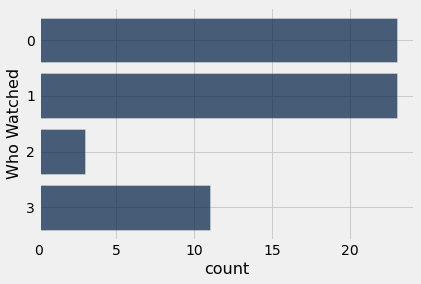

In [63]:
# Explore the data a bit first

# We can code the data in different ways
# 0- no one watched
# 1- Yanay Watched
# 2- Katherine Watched
# 3- Yanay and Katherine Watched
# Categorical Distribution!
# (actually a binary encoding)
with_new_col = movies.with_column("Who Watched", 
                   movies.column("Yanay Watched") + 2 * movies.column("Katherine Watched")
                  )
    
with_new_col.group("Who Watched").barh("Who Watched")

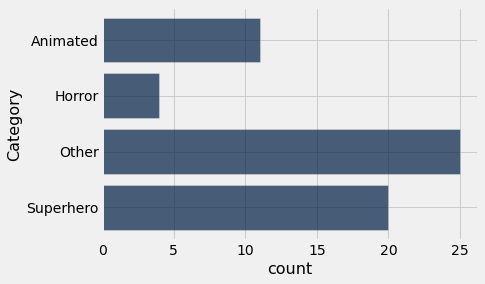

In [64]:
# what about categories
with_new_col.group("Category").barh("Category", "count")

### Let's explore relationship between `Budget` and `Domestic Gross`

What's a good type of plot for this purpose? </h3>

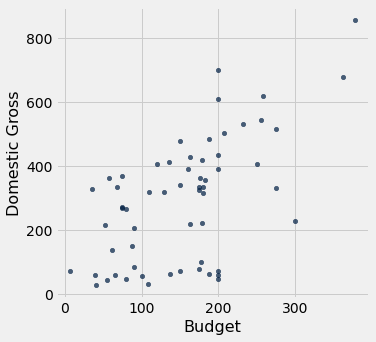

In [65]:
movies.scatter('Budget', 'Domestic Gross')

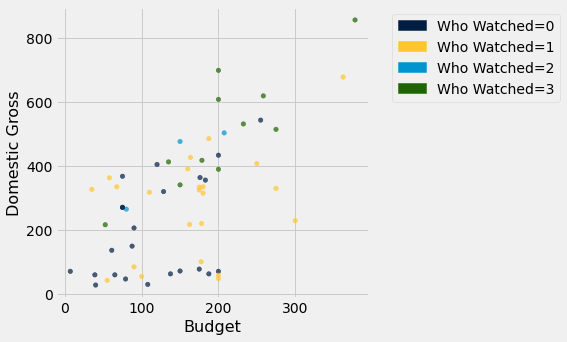

In [66]:
# Association with wether or not Katherine and I watched?
with_new_col.scatter('Budget', 'Domestic Gross', group="Who Watched")

### Discuss
Suppose we know the `Budget` is 200 million dollars for an upcoming CDSS biopic about me.  

What can we predict for the domestic gross for the movie?

Let's look at other movies whose `Budget` are near 200 (million dollars).

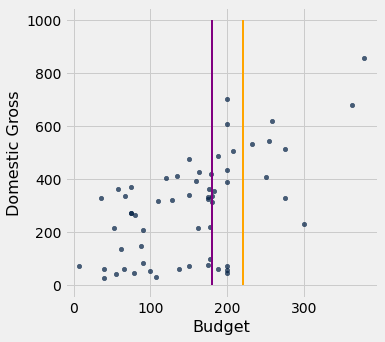

In [72]:
movies.scatter('Budget', 'Domestic Gross')

#The following lines plot vertical reference lines
#lw denotes line width (out of scope!)
plots.plot([180, 180], [0, 1000], color='purple', lw=2)  #lw denotes line width
plots.plot([220, 220], [0, 1000], color='orange', lw=2);

### Now let's calculate the Average `Domestic Gross` of the people within the region bounded by the vertical lines.

### Grab only the rows where `Budget` is in the interval   
$$180 \leq \texttt{Budget} < 220.$$

In [73]:
# Grab only the rows where budget is in the interval 180 <= Budget < 220
nearby = movies.where('Budget', are.between(180, 220))
nearby

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched
2021,F9*,Universal,70,200,Other,0,0
2020,Onward,Disney,62,187.5,Animated,0,0
2020,Tenet,Warner Bros.,58,200,Other,1,0
2020,Wonder Woman 1984,Warner Bros.,47,200,Superhero,1,0
2019,Toy Story 4,nan,434,200,Animated,0,0
2019,Aladdin,Disney,356,183,Other,0,0
2018,Black Panther,Disney,700,200,Superhero,1,1
2018,Incredibles 2,nan,609,200,Animated,1,1
2018,Aquaman,Warner Bros.,335,180,Superhero,1,0
2017,Beauty and the Beast,nan,504,207.5,Other,0,1


Now take average `Domestic Gross` of the movies with these budgets.

New Function Alert: `np.mean` or `np.average`.

In [74]:
# Take the average 
nearby_mean = np.mean(nearby.column('Domestic Gross'))
nearby_mean

335.84615384615387

### Visualize

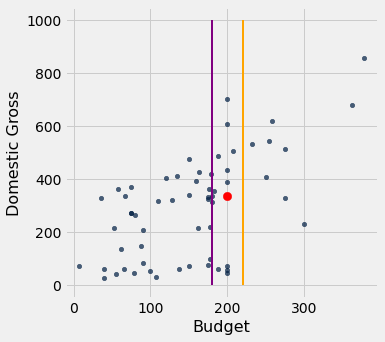

In [76]:
movies.scatter('Budget', 'Domestic Gross')

# Out of scope
plots.plot([180, 180], [0, 1000], color='purple', lw=2)  #lw denotes line width
plots.plot([220, 220], [0, 1000], color='orange', lw=2);
#We insert a dot of size s=70, of our desired color, as a single-point superimposed on the original plot.
plots.scatter(200, nearby_mean, color='red', s=70);  # s=70 specifies the size of the dot

<h3> Now let's generalize ...</h3>

In [77]:
def predict(budget):
    nearby_movies = movies.where('Budget', are.between(budget-20, budget+20))
    return np.mean(nearby_movies.column('Domestic Gross'))

In [78]:
predict(100)

157.85714285714286

In [79]:
predict(300)

229.0

In [80]:
predict(5) # Katherine Biopic :(

70.0

<h3> Now <tt>apply</tt> our <tt>predict</tt> function to the entire table.</h3>

In [81]:
predicted_domestic_gross = movies.apply(predict, 'Budget')
predicted_domestic_gross

array([215.54545455, 295.13333333, 299.875     , 335.84615385,
       172.33333333, 157.85714286, 199.        , 173.77777778,
       182.66666667, 172.33333333, 174.2       , 204.8       ,
       174.2       , 295.13333333,  70.        , 298.42857143,
       300.        , 215.54545455, 335.84615385, 335.84615385,
       768.5       , 524.        , 502.25      , 299.875     ,
       335.84615385, 298.        , 289.38461538, 306.35      ,
       215.54545455, 303.6       , 335.84615385, 768.5       ,
       335.84615385, 295.13333333, 295.13333333, 202.28571429,
       199.53846154, 295.13333333, 294.13333333, 173.77777778,
       483.4       , 336.        , 298.42857143, 228.71428571,
       335.84615385, 295.13333333, 157.25      , 295.13333333,
       199.        , 229.        , 470.        , 300.        ,
       526.        , 199.53846154, 295.13333333, 195.09090909,
       299.875     , 502.25      , 295.13333333, 199.53846154])

<h3> Now add the predicted values as a new column to our table.</h3>

In [82]:
movies_with_predictions = movies.with_column('Predicted Gross', predicted_domestic_gross)
movies_with_predictions.show(5)

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched,Predicted Gross
2021,A Quiet Place Part II*,Paramount,136,61,Horror,0,0,215.545
2021,Godzilla vs. Kong*,Warner Bros.,100,177.5,Other,1,0,295.133
2021,Cruella*,Disney,71,150,Other,0,0,299.875
2021,F9*,Universal,70,200,Other,0,0,335.846
2021,The Conjuring: The Devil Made Me Do It*,Warner Bros.,59,39,Horror,0,0,172.333


#### Overlaid Chart!

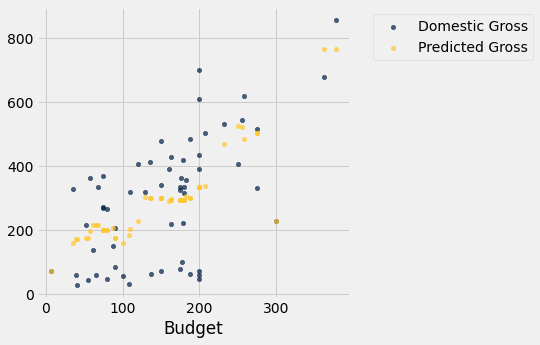

In [83]:
movies_with_predictions.select('Budget', 'Domestic Gross', 'Predicted Gross').scatter('Budget')

Q. Do you notice any patterns the `Predicted Gross` column above?




<h2> Prediction Accuracy: How good are our predictions? </h2>

<h3> Write a function that computes the difference between two values.</h3>

In [86]:
# difference between two nums
def difference(x, y):
    return x - y

Now apply to the Domestic Gross and Predicted Gross columns!

In [87]:
pred_errors = movies_with_predictions.apply(difference, 'Domestic Gross', 'Predicted Gross')
pred_errors

array([ -79.54545455, -195.13333333, -228.875     , -265.84615385,
       -113.33333333, -103.85714286, -153.        , -131.77777778,
       -153.66666667, -145.33333333,   31.8       ,  -55.8       ,
        -90.2       , -218.13333333,    0.        , -236.42857143,
       -238.        , -156.54545455, -277.84615385, -288.84615385,
         89.5       ,   20.        ,   12.75      ,  177.125     ,
         98.15384615,  129.        ,  101.61538462,   49.65      ,
        119.45454545,   16.4       ,  364.15384615,  -89.5       ,
        273.15384615,  122.86666667,   39.86666667,  115.71428571,
         71.46153846,  -75.13333333,  -77.13333333,   42.22222222,
        136.6       ,  168.        ,  114.57142857,  176.28571429,
         54.15384615,   38.86666667,  169.75      ,   19.86666667,
         66.        ,    0.        ,   62.        ,  186.        ,
       -118.        ,  168.46153846,   68.86666667,  167.90909091,
         41.125     , -172.25      ,   29.86666667,   70.46153

<h3> Add the errors array as a new column to our table.</h3>

In [88]:
with_errors = movies_with_predictions.with_column('errors', pred_errors)
with_errors

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched,Predicted Gross,errors
2021,A Quiet Place Part II*,Paramount,136,61,Horror,0,0,215.545,-79.5455
2021,Godzilla vs. Kong*,Warner Bros.,100,177.5,Other,1,0,295.133,-195.133
2021,Cruella*,Disney,71,150,Other,0,0,299.875,-228.875
2021,F9*,Universal,70,200,Other,0,0,335.846,-265.846
2021,The Conjuring: The Devil Made Me Do It*,Warner Bros.,59,39,Horror,0,0,172.333,-113.333
2021,Raya and the Last Dragon*,Disney,54,100,Animated,1,0,157.857,-103.857
2021,Tom & Jerry*,Warner Bros.,46,79,Other,0,0,199,-153
2021,Mortal Kombat*,Warner Bros.,42,55,Other,1,0,173.778,-131.778
2021,Peter Rabbit 2: The Runaway*,Sony Pictures,29,107.9,Other,0,0,182.667,-153.667
2021,Wrath of Man*,MGM,27,40,Other,0,0,172.333,-145.333


<h3> Now create a histogram of the errors.</h3>

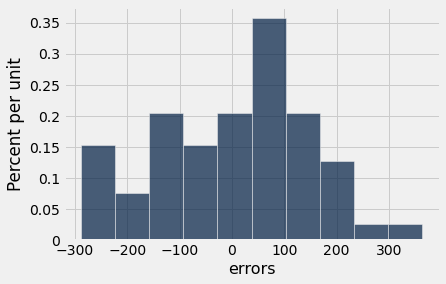

In [89]:
with_errors.hist('errors')

### Make a histogram  of errors based on Categorical Variables (Overlaid!)

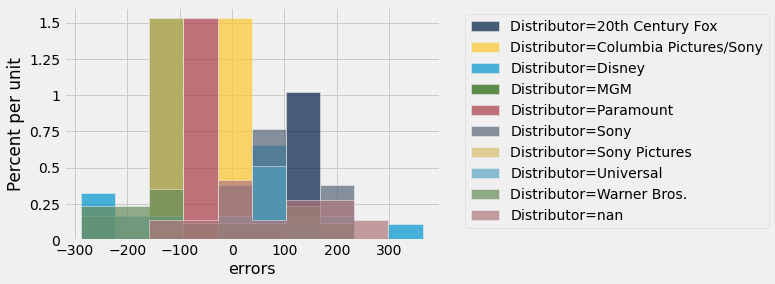

In [90]:
with_errors.hist('errors', group='Distributor')

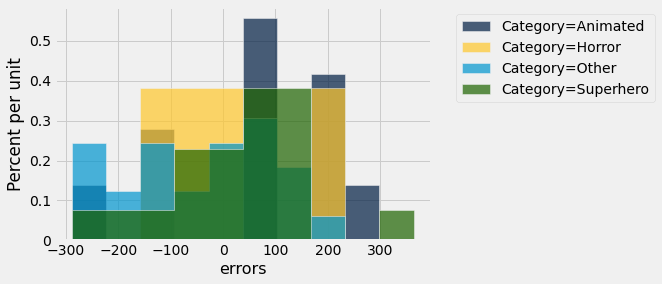

In [91]:
with_errors.hist('errors', group='Category')

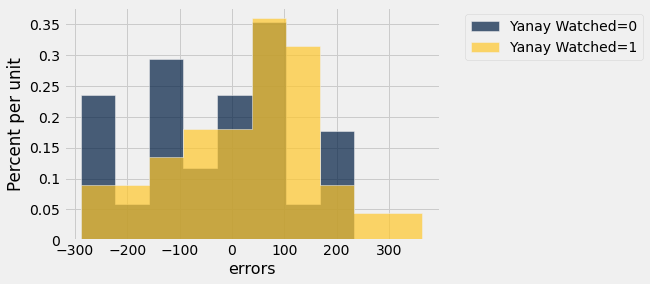

In [92]:
with_errors.hist('errors', group='Yanay Watched')

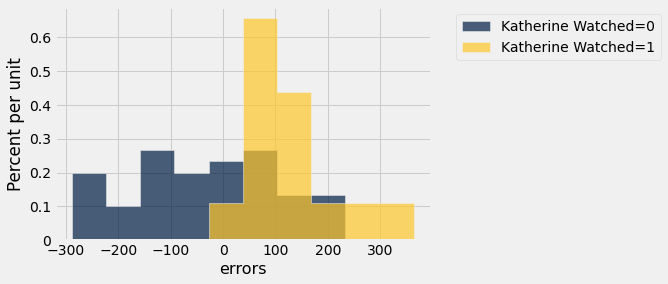

In [93]:
with_errors.hist('errors', group='Katherine Watched')

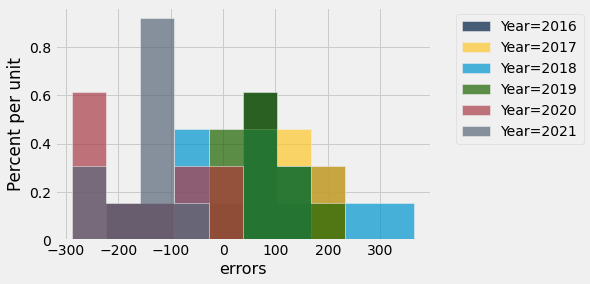

In [94]:
with_errors.hist('errors', group='Year')

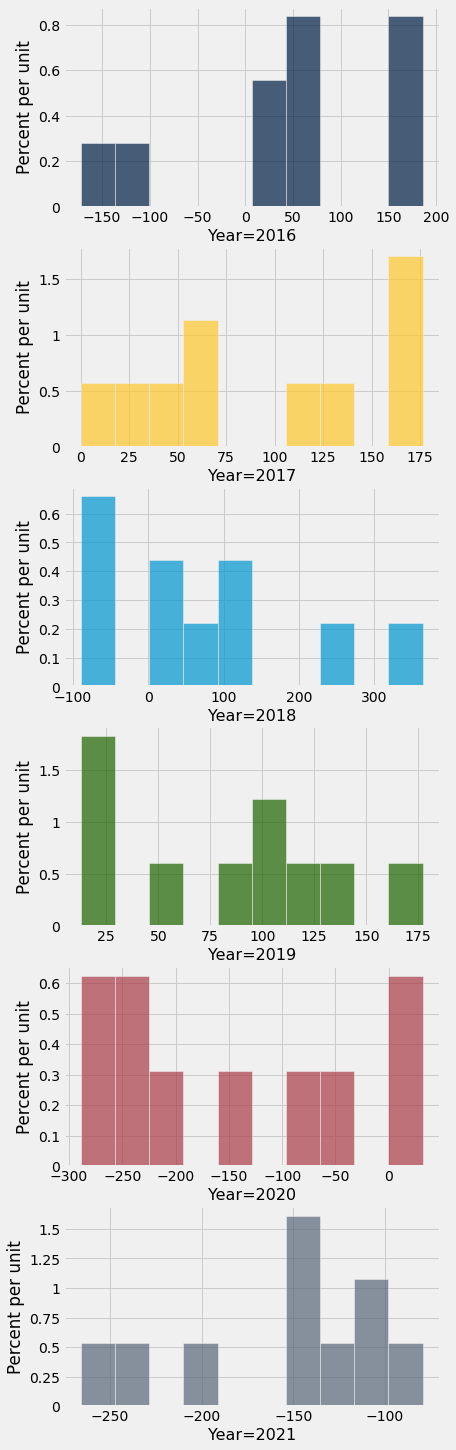

In [95]:
with_errors.hist('errors', group='Year', overlay=False) # Non overlaid!

# Discussion Question

## How do we make better predictions?







In [110]:
# budget and year
# using where

def predict_smarter(budget, year):
    nearby = movies.where('Budget', are.between(budget-20, budget+20))
    nearby_same_year = nearby.where('Year', year)
    return np.mean(nearby_same_year.column('Domestic Gross'))

In [111]:
predict_smarter(200, 2021) # Yanay Biopic

70.0

In [112]:
predict_smarter(200, 2020) # Yanay Biopic

55.666666666666664

In [113]:
predict_smarter(200, 2019) # Yanay Biopic

395.0

In [114]:
smarter_predicted_gross = movies.apply(predict_smarter, 'Budget', 'Year')
smarter_predictions = movies.with_column('Smart Gross Predictions', smarter_predicted_gross)

In [115]:
smarter_pred_errs = smarter_predictions.apply(difference, 'Domestic Gross', 'Smart Gross Predictions')
smarter_with_errors = smarter_predictions.with_column('Smart Errors', smarter_pred_errs)

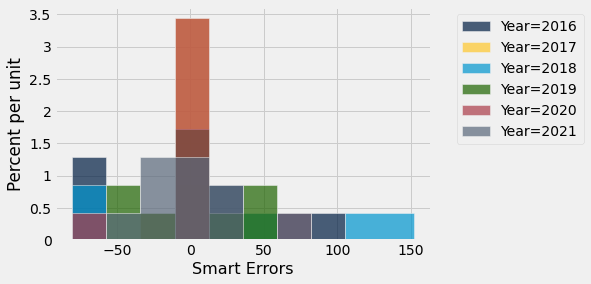

In [116]:
smarter_with_errors.hist('Smart Errors', group='Year')